<a href="https://colab.research.google.com/github/minseo0214/2020study/blob/master/cnn%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import keras 

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, AveragePooling2D
from keras.optimizers import Adam
from keras.losses import sparse_categorical_crossentropy as scc
from keras.datasets import cifar10

import numpy as np
import matplotlib.pyplot as plt

In [12]:
def build_model(width, height, channel):
    model = Sequential() #초기화 진행
    
    model.add(Conv2D(
        filters=16,
        kernel_size=(3,3),
        padding='same',
        activation='relu',
        input_shape=(width, height, channel) #처음에만 넣어줌.
    ))
    model.add(Conv2D(
        filters=16,
        kernel_size=(3,3),
        padding='same',
        activation='relu'
    ))
    model.add(MaxPooling2D( #이미지가 반으로 줄어듬.
        pool_size=(2,2),
        padding='same'
    ))

    model.add(Conv2D(
        filters=32,
        kernel_size=(3,3),
        padding='same',
        activation='relu'
    ))
    model.add(Conv2D(
        filters=64,
        kernel_size=(3,3),
        padding='same',
        activation='relu'
    ))
    model.add(AveragePooling2D(
        pool_size=(8,8),
        padding='same'
    ))

    model.add(Flatten())
    model.add(Dense(
        units=640,
        activation='relu'
    ))
    model.add(Dense(
        units=10, #분류의 개수
        activation='softmax'
    ))

    opt = Adam(learning_rate=0.001)
    model.compile(
        optimizer=opt,
        loss=scc, #loss값은 항상 출력됨.
        metrics=['accuracy'] #정확도를 출력하겠다.
    )

    return model

In [13]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

model = build_model(x_train.shape[1],x_train.shape[2],x_train.shape[3])

In [15]:
hist =  model.fit(
        x_train, y_train, 
        batch_size=64, epochs=10, 
        verbose=1, 
        shuffle=True, validation_split=0.1
    )
    
model.evaluate(x_test, y_test, verbose=1)

Epoch 1/10
704/704 [==============================] - 111s 158ms/step - loss: 1.3886 - accuracy: 0.5007 - val_loss: 1.1888 - val_accuracy: 0.5860
Epoch 2/10
704/704 [==============================] - 113s 160ms/step - loss: 1.0777 - accuracy: 0.6224 - val_loss: 1.0165 - val_accuracy: 0.6474
Epoch 3/10
704/704 [==============================] - 113s 160ms/step - loss: 0.9189 - accuracy: 0.6770 - val_loss: 0.8696 - val_accuracy: 0.6940
Epoch 4/10
704/704 [==============================] - 113s 161ms/step - loss: 0.8123 - accuracy: 0.7182 - val_loss: 0.8433 - val_accuracy: 0.7014
Epoch 5/10
704/704 [==============================] - 113s 160ms/step - loss: 0.7327 - accuracy: 0.7435 - val_loss: 0.8071 - val_accuracy: 0.7196
Epoch 6/10
704/704 [==============================] - 113s 160ms/step - loss: 0.6565 - accuracy: 0.7676 - val_loss: 0.7832 - val_accuracy: 0.7332
Epoch 7/10
704/704 [==============================] - 113s 160ms/step - loss: 0.6009 - accuracy: 0.7884 - val_loss: 0.8138 -

[0.7947245240211487, 0.7468000054359436]

In [16]:
model.evaluate(
    x_test,y_test,
    batch_size = 64,
    verbose = 1
  )

157/157 [==============================] - 7s 45ms/step - loss: 0.7947 - accuracy: 0.7468


[0.7947243452072144, 0.7468000054359436]

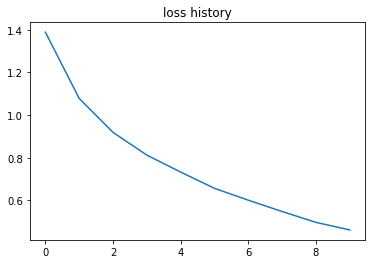

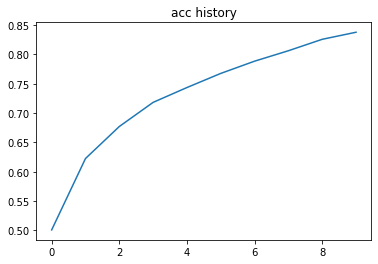

In [17]:
plt.plot(hist.history['loss']) #정답과 얼마나 거리가 있는가.
plt.title("loss history")
plt.show()

plt.plot(hist.history['accuracy']) #정확도가 얼마나 들어나는가
plt.title("acc history")

plt.show()